In [12]:
import os, shutil

original_dataset_dir = "cats_vs_dogs/train"

dirs = []

base_dir = "cats_vs_dogs_small"
dirs.append(base_dir)

train_dir = os.path.join(base_dir, "train")
dirs.append(train_dir)
validation_dir = os.path.join(base_dir, "validation")
dirs.append(validation_dir)
test_dir = os.path.join(base_dir, "test")
dirs.append(test_dir)

train_cats_dir = os.path.join(train_dir, "cats")
dirs.append(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, "dogs")
dirs.append(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, "cats")
dirs.append(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, "dogs")
dirs.append(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, "cats")
dirs.append(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, "dogs")
dirs.append(test_dogs_dir)

for directory in dirs:
    if not os.path.exists(directory):
       os.mkdir(directory)
    
fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_cats_dir, fname)
    shutil.copy(src, dest)

fnames = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_cats_dir, fname)
    shutil.copy(src, dest)

fnames = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_cats_dir, fname)
    shutil.copy(src, dest)
   
fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_dogs_dir, fname)
    shutil.copy(src, dest)

fnames = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_dogs_dir, fname)
    shutil.copy(src, dest)

fnames = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_dogs_dir, fname)
    shutil.copy(src, dest)

for directory in dirs:
    print(directory, ":", len(os.listdir(directory)))
    
print("Done.")

cats_vs_dogs_small : 3
cats_vs_dogs_small/train : 2
cats_vs_dogs_small/validation : 2
cats_vs_dogs_small/test : 2
cats_vs_dogs_small/train/cats : 1000
cats_vs_dogs_small/train/dogs : 1000
cats_vs_dogs_small/validation/cats : 500
cats_vs_dogs_small/validation/dogs : 500
cats_vs_dogs_small/test/cats : 500
cats_vs_dogs_small/test/dogs : 500
Done.


In [43]:
from keras import models,layers,optimizers

model = models.Sequential()

model.add(layers.Conv2D(32,
                (3,3),
                activation="relu",
                input_shape=(150,150,3)
))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,
                (3,3),
                activation="relu",
                input_shape=(150,150,3)
))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,
                (3,3),
                activation="relu",
                input_shape=(150,150,3)
))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(128,
                (3,3),
                activation="relu",
                input_shape=(150,150,3)
))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [29]:
'''
batch-size has no bearing on outcome but makes it faster
'''

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [40]:
'''
generators decouples fetching of data from the processing of the data
'''

images, labels = next(train_generator)

Text(0.5, 1.0, 'Class:1.0')

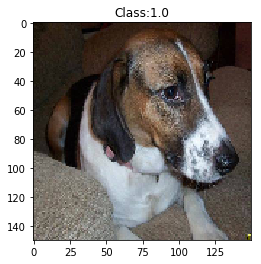

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(images[19])
plt.title("Class:"+ str(labels[19]))

In [45]:
history= model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 66s 665ms/step - loss: 0.6883 - acc: 0.5295 - val_loss: 0.6638 - val_acc: 0.6390
Epoch 2/30
100/100 [==============================] - 64s 643ms/step - loss: 0.6661 - acc: 0.5940 - val_loss: 0.6414 - val_acc: 0.6690
Epoch 3/30
100/100 [==============================] - 65s 654ms/step - loss: 0.6254 - acc: 0.6655 - val_loss: 0.5818 - val_acc: 0.6880
Epoch 4/30
100/100 [==============================] - 63s 628ms/step - loss: 0.5862 - acc: 0.7015 - val_loss: 0.5839 - val_acc: 0.6640
Epoch 5/30
100/100 [==============================] - 63s 627ms/step - loss: 0.5466 - acc: 0.7170 - val_loss: 0.5219 - val_acc: 0.7440
Epoch 6/30
100/100 [==============================] - 63s 626ms/step - loss: 0.5087 - acc: 0.7465 - val_loss: 0.4980 - val_acc: 0.7610
Epoch 7/30
100/100 [==============================] - 64s 635ms/step - loss: 0.4961 - acc: 0.7555 - val_loss: 0.4786 - val_acc: 0.7660
Epoch 8/30
100/100 [==============================] - 6

In [46]:
'''
flipping an image, tilting, reversing it, or even changing the colour slightly can create more data!
'''

'\nflipping an image, tilting, reversing it, or even changing the colour slightly can create more data!\n'